# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
Complete_Data = pd.merge(mouse_metadata, study_results,how="left",on=["Mouse ID","Mouse ID"])

# Display the data table for preview
Complete_Data.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [5]:
# Checking the number of mice.
Mice = Complete_Data["Mouse ID"].unique()
len(Mice)

249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Dupe_Mice = Complete_Data[Complete_Data.duplicated(["Mouse ID","Timepoint"])]
Dupe_Mice_ID = Dupe_Mice["Mouse ID"].unique()
Dupe_Mice_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
Dupe_Rows = Complete_Data[Complete_Data["Mouse ID"].isin(Dupe_Mice_ID)]
Dupe_Rows

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Clean_Data = Complete_Data.loc[Complete_Data["Mouse ID"].isin(Dupe_Mice_ID)==False]

In [11]:
# Checking the number of mice in the clean DataFrame.
Mice = Clean_Data["Mouse ID"].unique()
Num_Mice = len(Mice)
Num_Mice

248

## Summary Statistics

In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume.
Mean_Tumor_Vol = Clean_Data["Tumor Volume (mm3)"].mean()
Median_Tumor_Vol = Clean_Data["Tumor Volume (mm3)"].median()
Var_Tumor_Vol = Clean_Data["Tumor Volume (mm3)"].var()
StDev_Tumor_Vol = Clean_Data["Tumor Volume (mm3)"].std()
SEM_Tumor_Vol = Clean_Data["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary DataFrame.
Tumor_Vol_summary = pd.DataFrame({
    "Mean": [Mean_Tumor_Vol],
    "Median": [Median_Tumor_Vol],
    "Variance": [Var_Tumor_Vol],
    "Standard Deviation": [StDev_Tumor_Vol],
    "SEM": [SEM_Tumor_Vol]
})
Tumor_Vol_summary

,Mean,Median,Variance,Standard Deviation,SEM
0,50.435293,48.933454,79.462907,8.914197,0.205591


In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
Mean_Tumor_Regi = Clean_Data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
Median_Tumor_Regi = Clean_Data.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
Var_Tumor_Regi = Clean_Data.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
StDev_Tumor_Regi = Clean_Data.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
SEM_Tumor_Regi = Clean_Data.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
# Assemble the resulting series into a single summary DataFrame.
Tumor_Vol_by_Regimen = pd.DataFrame({
    "Mean": Mean_Tumor_Regi,
    "Median": Median_Tumor_Regi,
    "Variance": Var_Tumor_Regi,
    "Standard Deviation": StDev_Tumor_Regi,
    "SEM": SEM_Tumor_Regi
})
Tumor_Vol_by_Regimen

In [30]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
Mean_Tumor_Regi = Clean_Data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
Median_Tumor_Regi = Clean_Data.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
Var_Tumor_Regi = Clean_Data.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
StDev_Tumor_Regi = Clean_Data.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
SEM_Tumor_Regi = Clean_Data.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
# Using the aggregation method, produce the same summary statistics in a single line.
Aggregate_Tumor_Regi = Clean_Data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])
Aggregate_Tumor_Regi

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

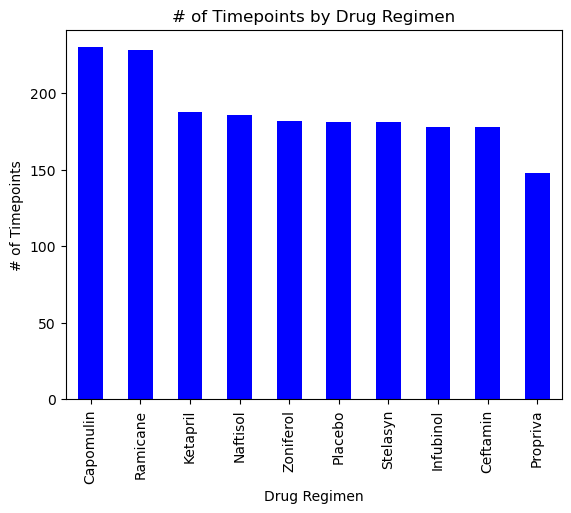

In [32]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
Timepoints_by_Regi = Clean_Data["Drug Regimen"].value_counts()
Timepoints_by_Regi.plot(kind="bar",facecolor="blue")
plt.title("# of Timepoints by Drug Regimen")
plt.ylabel("# of Timepoints")
plt.xlabel("Drug Regimen")

plt.show()


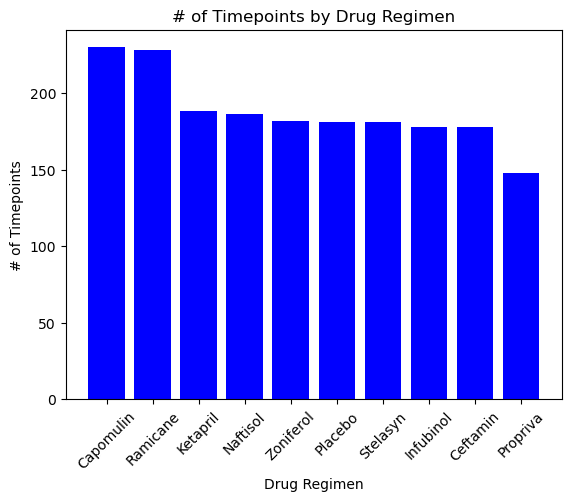

In [37]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = Clean_Data["Drug Regimen"].value_counts()
plt.bar(x_axis.index.values,x_axis.values,facecolor="blue",alpha=1,align="center")
plt.title("# of Timepoints by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Timepoints")
plt.xticks(rotation=45)
plt.show()


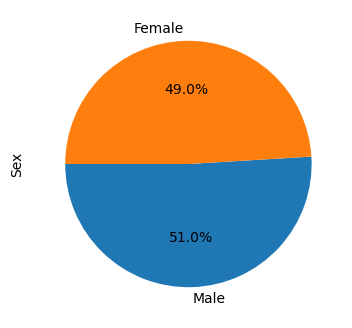

In [55]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
Mice_Gender = Clean_Data["Sex"].value_counts()
Mice_Gender.plot(kind="pie", figsize=(4,4), startangle=180,autopct="%1.1f%%")
plt.show()


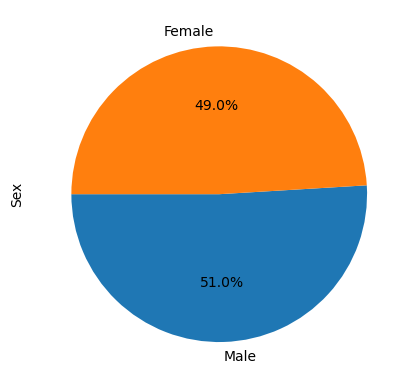

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(Mice_Gender,labels=["Male","Female"],autopct="%1.1f%%",startangle=180)
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


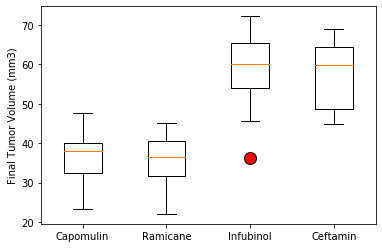

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

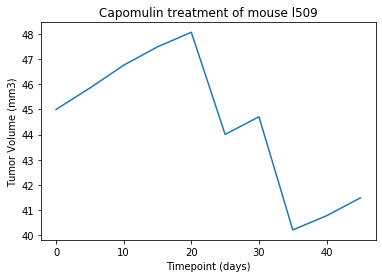

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



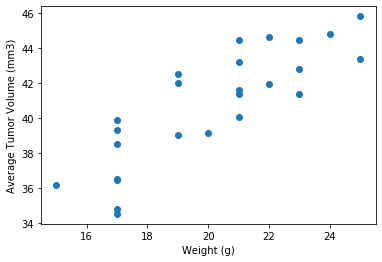

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


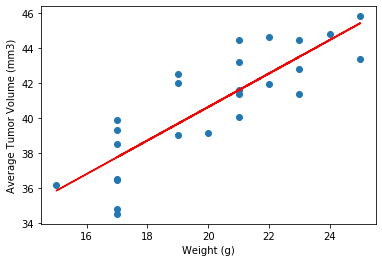

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

